In [5]:
import numpy as np
m=100
X=6*np.random.rand(m,1)-3
y=0.5*X**2+X+2+np.random.randn(m,1)

from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0], X_poly[0]

(array([-1.52188631]), array([-1.52188631,  2.31613793]))

In [6]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.8252284]), array([[1.0190161 , 0.50464321]]))

当存在多个特征时，多项式回归能够找到特征之间的关系。PolynomialFeatures还可以将特征的所有组合添加到给定的多项式阶数。例如，如果有两个特征a，b，则degree=3的PolynomialFeatures不仅会添加特征$a^2$、$a^3$、$b^2$和$b^3$，也会添加组合$ab$、$a^2b$和$ab^2$

PolynomialFeatures(degree=d)可以将一个包含n个特则会那个的数组转换为包含$\frac{(n+d)!}{d!n!}$个特征的数组

学习曲线：绘制了模型在训练集和验证集上关于训练集大小（或训练迭代）的性能函数

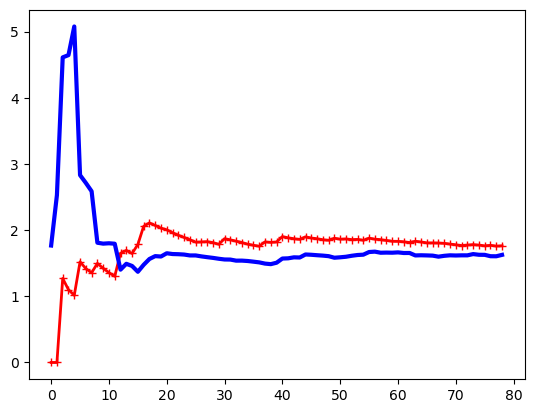

In [9]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val= train_test_split(X, y, test_size=0.2)
    train_errors, val_errors=[], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict=model.predict(X_train[:m])
        y_val_predict=model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
lin_reg=LinearRegression()
plot_learning_curves(lin_reg, X, y)


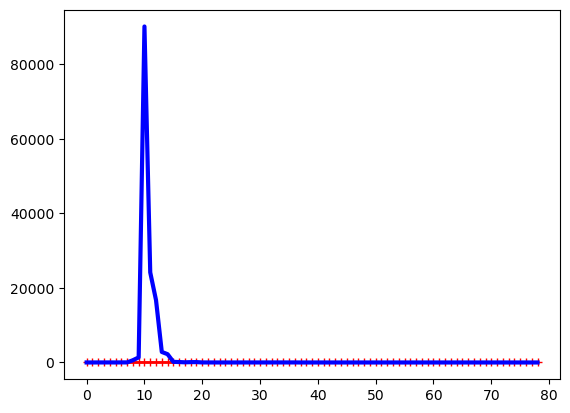

In [11]:
#10阶多项式模型的学习曲线
from sklearn.pipeline import Pipeline
polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression()),
])
plot_learning_curves(polynomial_regression, X, y)

模型的泛化误差可以表示为三个非常不同的误差之和

1.偏差：原因在于错误的假设。高偏差模型最有可能欠拟合训练数据

2.方差：由于模型对训练数据的席位变化过于敏感。具有许多自由度的模型（如高阶多项式模型）可能具有较高的方差，因此可能过拟合训练数据

3.不可避免的误差：由于数据本身的噪声所致。减少这部分误差的唯一方法是清理数据